In [1]:
import pandas as pd
from pathlib import Path
import json
import csv

In [2]:
 import nltk
    
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
%matplotlib inline
import re
import seaborn as sbn
import nltk
import tqdm as tqdm
import sqlite3
import pandas as pd
import numpy as np

import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


#from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

In [6]:
df = pd.read_json(r'C:\Users\Owner\Desktop\Pbi_project\Prime_Pantry.json', lines=True, compression='gzip')
df.to_csv(r'C:\Users\Owner\Desktop\Pbi_project\Prime_Pantry.csv', index=None)

In [7]:
#Making Dataframe
review_df = pd.read_csv(r'C:\Users\Owner\Desktop\Pbi_project\Prime_Pantry.csv')
review_df

C:\Users\Owner\AppData\Local\Temp\ipykernel_13420\3130578771.py:2: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  review_df = pd.read_csv(r'C:\Users\Owner\Desktop\Pbi_project\Prime_Pantry.csv')


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5,True,"12 14, 2014",A1NKJW0TNRVS7O,B0000DIWNZ,Tamara M.,Good clinging,Clings well,1418515200,NaN,NaN,NaN
1,4,True,"11 20, 2014",A2L6X37E8TFTCC,B0000DIWNZ,Amazon Customer,Fantastic buy and a good plastic wrap. Even t...,Saran could use more Plus to Cling better.,1416441600,NaN,NaN,NaN
2,4,True,"10 11, 2014",A2WPR4W6V48121,B0000DIWNZ,noname,ok,Four Stars,1412985600,NaN,NaN,NaN
3,3,False,"09 1, 2014",A27EE7X7L29UMU,B0000DIWNZ,ZapNZs,Saran Cling Plus is kind of like most of the C...,"The wrap is fantastic, but the dispensing, cut...",1409529600,4.0,NaN,NaN
4,4,True,"08 10, 2014",A1OWT4YZGB5GV9,B0000DIWNZ,Amy Rogers,This is my go to plastic wrap so there isn't m...,has been doing it's job for years,1407628800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
471609,5,True,"05 16, 2017",A19GSVHXVT5NNF,B01HI8JVI8,Mary Bright,Easy and delicious! I am usually a make-my-own...,Easy and delicious,1494892800,NaN,NaN,NaN
471610,5,True,"05 3, 2017",ABSCTKLX9F9IU,B01HI8JVI8,Lisa and Eric,Our elderly neighbor loves this and eats it on...,Salsa,1493769600,NaN,NaN,NaN
471611,5,False,"04 20, 2017",A2R33RCWKDHZ3L,B01HI8JVI8,Elle S.,"Great product, great price.",Five Stars,1492646400,NaN,NaN,NaN
471612,5,True,"04 19, 2017",A2INGHYEXZDHMC,B01HI8JVI8,Shelina is Platinum!,Great size value for the price! Salsa is chunk...,Five Stars,1492560000,NaN,NaN,NaN


In [8]:
#Coulmns in dataset
review_df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'style'],
      dtype='object')

In [9]:
#Dropping the columns not required
review_df=review_df.drop(['vote','verified','reviewTime','style','reviewerName', 'unixReviewTime', 'image'],axis=1)

In [10]:
type(review_df['reviewText'][0])

str

<Axes: xlabel='overall', ylabel='count'>

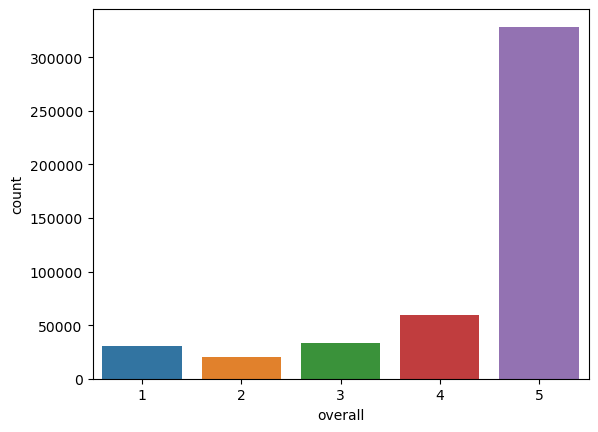

In [11]:
#Count of overall rating
sbn.countplot(x=review_df['overall'])

In [12]:
#Removing Stopwords
def data_clean( rev, remove_stopwords=True): 
    

    new_text = re.sub("[^a-zA-Z]"," ", rev)
   
    words = new_text.lower().split()
    
    if remove_stopwords:
        sts = set(stopwords.words("english"))
        words = [w for w in words if not w in sts]
    ary=[]
    eng_stemmer = english_stemmer 
    for word in words:
        ary.append(eng_stemmer.stem(word))

    
    return(ary)

In [13]:
cleaned_reviewData = []
for rev in review_df['reviewText']:
    #print(rev)
    cleaned_reviewData.append(" ".join(data_clean(str(rev))))
    
clean_summaryData = []
for rev in review_df['summary']:
    clean_summaryData.append(" ".join(data_clean(str(rev))))

In [14]:
#Fetching most frequent words from Review Text
Most_used_Words_Review =pd.Series(' '.join(cleaned_reviewData).lower().split()).value_counts()[:20]
print (Most_used_Words_Review)

great      103686
good        98433
love        88645
use         87385
like        84877
product     75722
tast        68058
one         45922
flavor      45470
work        44001
get         39284
price       36511
buy         34797
realli      34190
make        33276
tri         32924
smell       32356
time        32207
well        29912
would       28503
dtype: int64


In [15]:
#Fetching most frequent words from Review Summary
Most_used_Words_Summary = pd.Series(' '.join(clean_summaryData).lower().split()).value_counts()[:20]
print (Most_used_Words_Summary)

star       179812
five       133241
great       43717
good        35535
love        23449
four        22113
product     17475
tast        15113
like        14225
one         11967
best        11713
three       10755
work        10150
price        7825
flavor       7765
use          7587
smell        6984
two          6083
delici       5783
buy          5690
dtype: int64


In [16]:
#preparing matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
text_vectorizer = TfidfVectorizer(min_df=4, max_features = 1000)
test_vecor = text_vectorizer.fit_transform(cleaned_reviewData)
tfidf_vector = dict(zip(text_vectorizer.get_feature_names_out(), text_vectorizer.idf_))
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
# Sentiment Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sample_review = review_df.reviewText[:10]
for test in sample_review:
    test
    ss = analyser.polarity_scores(test)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(test)

compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good clinging
compound: 0.802, 
neg: 0.0, 
neu: 0.823, 
pos: 0.177, 
Fantastic buy and a good plastic wrap.  Even though labeled "Cling Plus," I feel that another plastic wrap holds and clings tighter for me.
Still, for the price and roll size, I'll order this product as needed with my Amazon Prime food orders.
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
ok
compound: 0.2743, 
neg: 0.133, 
neu: 0.734, 
pos: 0.133, 
Saran Cling Plus is kind of like most of the Cling Wrap from Glad. It is a very good quality plastic wrap, but the delivery system is poorly executed, and this makes usage more frustrating and less time-efficient. As convenience is one of the core selling points of this sort of product, how easy it is to use is just as important as how good the wrap itself is.

As another user here noted, getting this stuff out of the box and tearing off the portion you need to use is very difficult. Substantial force is required 

In [18]:
#Kmeans clusters
from sklearn.cluster import MiniBatchKMeans

clusters = 20
kmeans_model = MiniBatchKMeans(n_clusters=clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmodel = kmeans_model.fit(test_vecor)
kmodel_clusters = kmodel.predict(test_vecor)
kmodel_distances = kmodel.transform(test_vecor)
centroids = kmodel.cluster_centers_.argsort()[:, ::-1]
values = text_vectorizer.get_feature_names_out()
for i in range(clusters):
    print("Cluster %d:" % i)
    for j in centroids[i, :5]:
        print(' %s' % values[j])
    print()

Cluster 0:
 good
 great
 price
 product
 tast

Cluster 1:
 good
 product
 price
 tast
 valu

Cluster 2:
 expect
 great
 good
 love
 use

Cluster 3:
 yummi
 good
 love
 great
 snack

Cluster 4:
 perfect
 size
 snack
 work
 great

Cluster 5:
 work
 well
 great
 good
 realli

Cluster 6:
 expect
 work
 exact
 product
 good

Cluster 7:
 love
 product
 smell
 kid
 great

Cluster 8:
 great
 price
 coffe
 tast
 size

Cluster 9:
 ok
 tast
 work
 price
 like

Cluster 10:
 tasti
 snack
 good
 fresh
 healthi

Cluster 11:
 delici
 love
 buy
 tast
 one

Cluster 12:
 love
 great
 tast
 good
 use

Cluster 13:
 best
 favorit
 nice
 excel
 ever

Cluster 14:
 thank
 yum
 describ
 awesom
 box

Cluster 15:
 product
 great
 price
 fast
 ship

Cluster 16:
 delici
 snack
 love
 great
 tast

Cluster 17:
 great
 tast
 price
 smell
 valu

Cluster 18:
 stuff
 good
 love
 great
 work

Cluster 19:
 like
 use
 tast
 product
 great



In [19]:
test_reviewText = review_df.reviewText
test_Ratings = review_df.overall
text_vectorizer = TfidfVectorizer(max_df=.8)
text_vectorizer.fit_transform(test_reviewText.values.astype('U'))
#v.fit_transform(df['Review'].values.astype('U')) 
def rate(r):
    ary2 = []
    for rating in r:
        tv = [0,0,0,0,0]
        tv[rating-1] = 1
        ary2.append(tv)
    return np.array(ary2)
#Review text
test_reviewText =test_reviewText[:2000]
test_reviewText

0                                           Good clinging
1       Fantastic buy and a good plastic wrap.  Even t...
2                                                      ok
3       Saran Cling Plus is kind of like most of the C...
4       This is my go to plastic wrap so there isn't m...
                              ...                        
1995    For my wife and I this milk is nearly indispen...
1996                                  Not what I expected
1997    I've tried many of the Jalepeno chips, these g...
1998    These are my favorite potato chips. Nice and c...
1999    All the bags had stale chips. Our money was re...
Name: reviewText, Length: 2000, dtype: object

In [20]:
#Overall ratings
test_Ratings = test_Ratings[:2000]
test_Ratings

0       5
1       4
2       4
3       3
4       4
       ..
1995    3
1996    3
1997    5
1998    5
1999    3
Name: overall, Length: 2000, dtype: int64

In [21]:
X = text_vectorizer.transform(test_reviewText.values.astype('U')).toarray()
y = rate(test_Ratings.values)

In [22]:
#TextCNN Model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1)

#After performing Oversampling (because of high amount of data in with 5 Rating)
over = SMOTE(k_neighbors=3)
X_train, y_train = over.fit_resample(X_train, y_train)

#model implementation
model = Sequential()
model.add(Dense(128,input_dim=X_train.shape[1]))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
map=model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=10,batch_size=32,verbose=1)
model.evaluate(X_test,y_test)[1]



Epoch 1/10


187/187 [==============================] - 14s 69ms/step - loss: 1.0997 - accuracy: 0.7302 - val_loss: 1.0984 - val_accuracy: 0.5850
Epoch 2/10
187/187 [==============================] - 13s 71ms/step - loss: 0.4460 - accuracy: 0.8864 - val_loss: 1.0098 - val_accuracy: 0.6400
Epoch 3/10
187/187 [==============================] - 13s 67ms/step - loss: 0.2470 - accuracy: 0.9275 - val_loss: 1.0912 - val_accuracy: 0.6400
Epoch 4/10
187/187 [==============================] - 13s 67ms/step - loss: 0.1759 - accuracy: 0.9476 - val_loss: 1.2106 - val_accuracy: 0.6450
Epoch 5/10
187/187 [==============================] - 15s 78ms/step - loss: 0.1411 - accuracy: 0.9556 - val_loss: 1.3450 - val_accuracy: 0.6500
Epoch 6/10
187/187 [==============================] - 12s 67ms/step - loss: 0.1224 - accuracy: 0.9583 - val_loss: 1.4555 - val_accuracy: 0.6400
Epoch 7/10
187/187 [==============================] - 14s 73ms/step - loss: 0.1102 - accuracy: 0.9613 - val_loss: 1.5543 - val_accur

0.6349999904632568

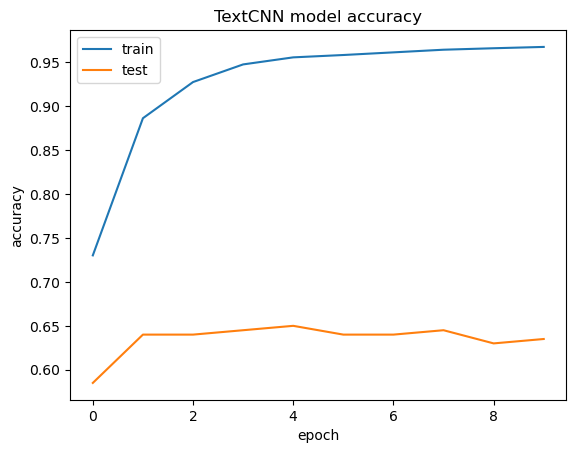

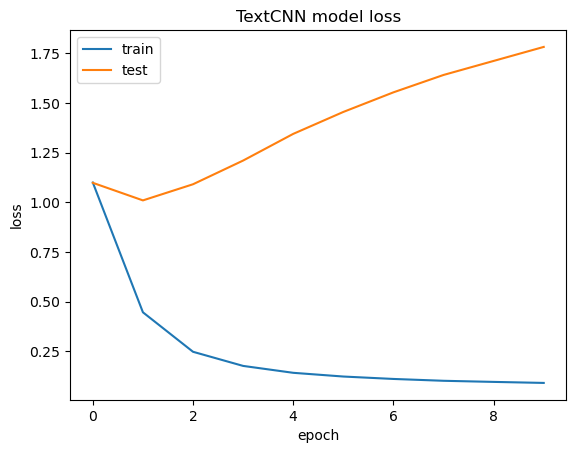

C:\Users\Owner\AppData\Local\Temp\ipykernel_13420\3885000689.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


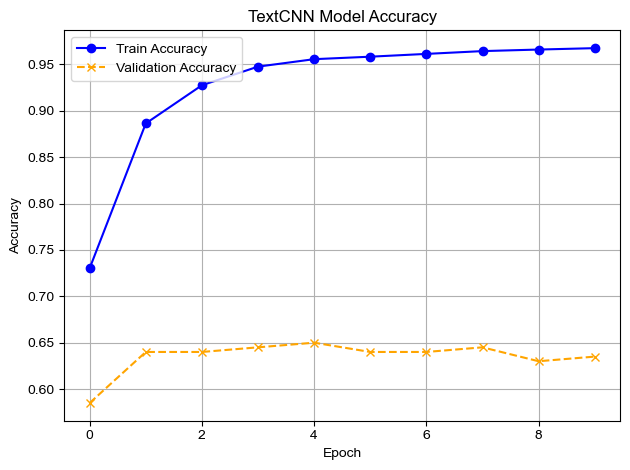

In [25]:

# Assuming 'history' is the variable storing the training history of your TextCNN model
plt.plot(map.history['accuracy'], color='blue', linestyle='-', marker='o', label='Train Accuracy')
plt.plot(map.history['val_accuracy'], color='orange', linestyle='--', marker='x', label='Validation Accuracy')
plt.title('TextCNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Customize the appearance further
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.tight_layout()  # Adjust layout for better appearance

plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_13420\1446743446.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


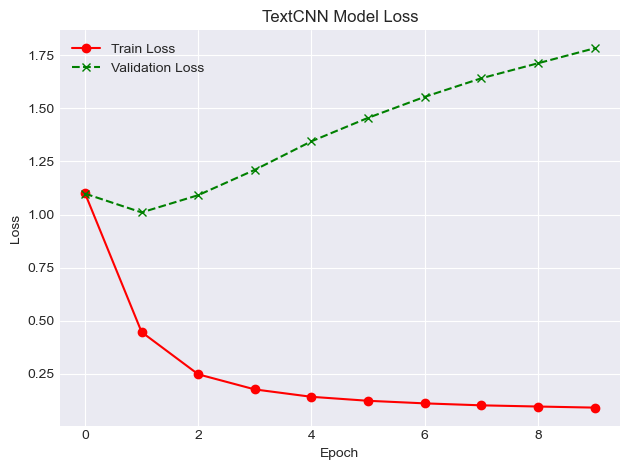

In [26]:
# Assuming 'history' is the variable storing the training history of your TextCNN model
plt.plot(map.history['loss'], color='red', linestyle='-', marker='o', label='Train Loss')
plt.plot(map.history['val_loss'], color='green', linestyle='--', marker='x', label='Validation Loss')
plt.title('TextCNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Customize the appearance further
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.tight_layout()  # Adjust layout for better appearance

plt.show()